INEL 4301 –  020 Theory of Communications I

Spring 2019

Homework #2 - Signal Spectral Analysis

Pedro Luis Rivera Gomez

In [0]:
import random
import math

# This function returns a noise function given the average pointer and std. dev.
def get_noise_signal(n, average_power, standard_deviation):
  average = 0
  values = []
  for index in range(n):
    values.insert(index, random.gauss(average_power, standard_deviation))
    average += values[index]
    values[index] = math.sqrt(math.fabs(values[index]))
    if(random.random() < 0.5):
      values[index] *= -1

  print("Noise Average Power: ", round(average / n, 1))
  return values
  
print(get_noise_signal(100, 0.1, 0.05))

Noise Average Power:  0.1
[0.2545846887195906, 0.39748327651526505, 0.2916557352361169, -0.11915724125768527, -0.3657485056770114, -0.30714759563917715, 0.4130074905940564, -0.22824834484971732, 0.28901323289751635, 0.35346450951908137, 0.3327249151941207, 0.4754079379472837, -0.11838882735979472, 0.3961283872955432, -0.3122940983560489, 0.38615331181933105, 0.3822881020067858, -0.4332692855541303, 0.31465497830948974, 0.12317900690910763, -0.35358496318859395, 0.22637899513150178, -0.3479954176403754, 0.21559255044195832, -0.4030352604497119, -0.3162969411222166, -0.24937304201183733, 0.28587907018923076, -0.23192327659053633, 0.2172858375242428, -0.4131172390806128, -0.22594637929029043, 0.28952602640489794, -0.15354146852162714, -0.21831344454400678, -0.3866076620433692, -0.2944492836469386, -0.28229285205659893, 0.33001715236783224, 0.32025811588022074, -0.36811779733848654, -0.34514059095922545, 0.29477269055866584, 0.3952348170386751, -0.2687952887880042, -0.3435204936012414, -0.

In [0]:
# Define Triangle Function. (http://mathworld.wolfram.com/TriangleFunction.html)
def triangle(t):
  if(math.fabs(t) >= 1):
    return 0
  return 1 - math.fabs(t)

# This function applies the triangle function over an input list.
def triangle_function(t):
  result = []
  for value in t[0]:
    result.append(triangle(value))
  return result

In [0]:
import numpy as np

# Define graphic intervals.
TIME_STEP = 0.01
START = -6
END = 6

time_array = []
current_time = START
while(current_time <= END):
  time_array.append(current_time)
  current_time += TIME_STEP

# Define the sub-functions.
cos_t = np.cos([y + (np.pi / 6) for y in [x * 5 * np.pi for x in time_array]])
exp_t = np.exp([(-5 / 11) * math.fabs(x) for x in time_array])
triangle_t = triangle_function([((2 / 7) * x for x in time_array)])
noise_t = get_noise_signal(len(time_array), 0.1, 0.05)

Noise Average Power:  0.1


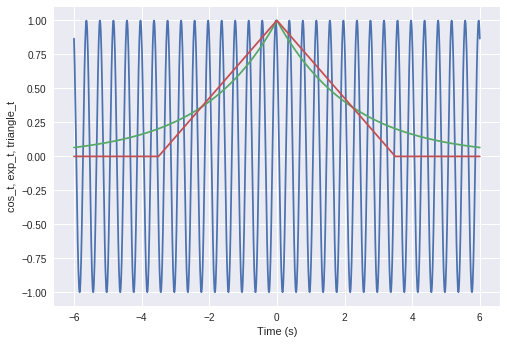

In [0]:
import matplotlib.pyplot as plt
# Ploting the sub-functions
plt.figure()
plt.xlabel("Time (s)")
plt.ylabel("cos_t, exp_t, triangle_t")
plt.plot(time_array, cos_t)
plt.plot(time_array, exp_t)
plt.plot(time_array, triangle_t)
# plt.plot(noise_t)

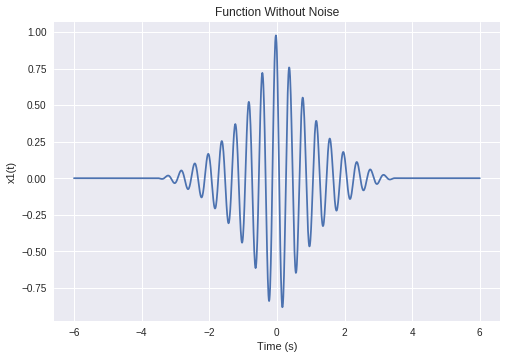

In [0]:
# Plotting the original function x1(t).
x1_t = [x * y * z for x, y, z in zip(cos_t, exp_t, triangle_t)]
plt.title("Function Without Noise")
plt.xlabel("Time (s)")
plt.ylabel("x1(t)")
plt.plot(time_array, x1_t)

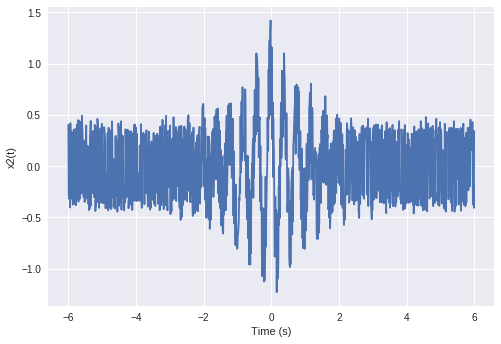

In [0]:
# Adding a noise signal whose average power is 0.1W.
x2_t = [x + y for x, y in zip(x1_t, noise_t)]
plt.xlabel("Time (s)")
plt.ylabel("x2(t)")
plt.plot(time_array, x2_t)

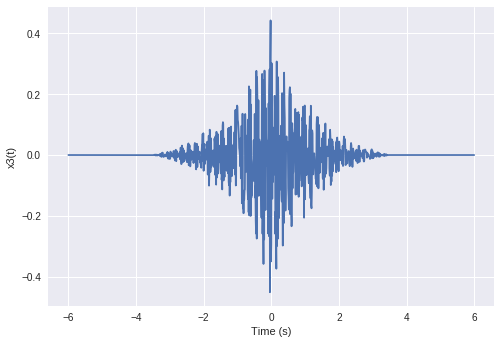

In [0]:
# Adding (Product) a noise signal whose average power is 0.1W.
x3_t = [x * y for x, y in zip(x1_t, noise_t)]
plt.xlabel("Time (s)")
plt.ylabel("x3(t)")
plt.plot(time_array, x3_t)

In [0]:
def display_values():
  index = 0
  for value in range(len(time_array)):
    print(time_array[value], x1_t[value])
  return x1_t[index]

print(display_values())

-6 0.0
-5.99 0.0
-5.98 0.0
-5.970000000000001 0.0
-5.960000000000001 0.0
-5.950000000000001 0.0
-5.940000000000001 0.0
-5.9300000000000015 -0.0
-5.920000000000002 -0.0
-5.910000000000002 -0.0
-5.900000000000002 -0.0
-5.890000000000002 -0.0
-5.880000000000003 -0.0
-5.870000000000003 -0.0
-5.860000000000003 -0.0
-5.850000000000003 -0.0
-5.840000000000003 -0.0
-5.830000000000004 -0.0
-5.820000000000004 -0.0
-5.810000000000004 -0.0
-5.800000000000004 -0.0
-5.7900000000000045 -0.0
-5.780000000000005 -0.0
-5.770000000000005 -0.0
-5.760000000000005 -0.0
-5.750000000000005 -0.0
-5.7400000000000055 -0.0
-5.730000000000006 0.0
-5.720000000000006 0.0
-5.710000000000006 0.0
-5.700000000000006 0.0
-5.690000000000007 0.0
-5.680000000000007 0.0
-5.670000000000007 0.0
-5.660000000000007 0.0
-5.6500000000000075 0.0
-5.640000000000008 0.0
-5.630000000000008 0.0
-5.620000000000008 0.0
-5.610000000000008 0.0
-5.6000000000000085 0.0
-5.590000000000009 0.0
-5.580000000000009 0.0
-5.570000000000009 0.0
-5.56

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


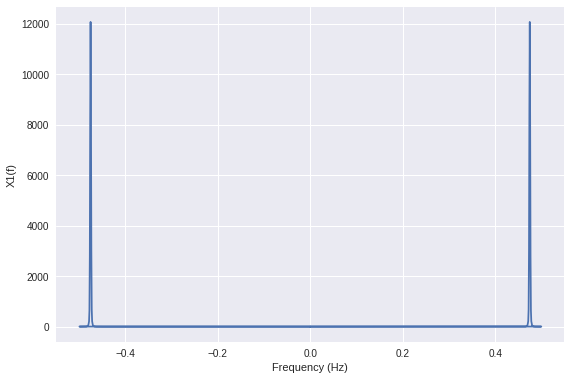

In [0]:
# At this point, homework #2 starts.
freq_array = np.fft.fftfreq(len(time_array))

# Recall x1_t is the function without noise.
X1_f = np.fft.fft(x1_t)
X1_f = np.fft.fftshift(X1_f)
X1_f_conjugate = np.conj(X1_f)
X1_f = [x * y for x, y in zip(X1_f, X1_f_conjugate)]
plt.xlabel("Frequency (Hz)")
plt.ylabel("X1(f)")
plt.plot(freq_array, X1_f)

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


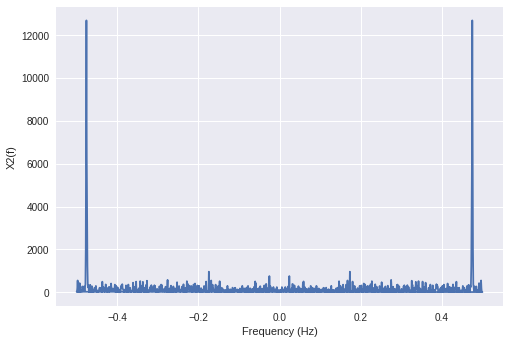

In [0]:
# Recall x2_t is the function with gaussian noise (average power = 0.1W).
X2_f = np.fft.fft(x2_t)
X2_f = np.fft.fftshift(X2_f)
X2_f_conjugate = np.conj(X2_f)
X2_f = [x * y for x, y in zip(X2_f, X2_f_conjugate)]
plt.xlabel("Frequency (Hz)")
plt.ylabel("X2(f)")
plt.plot(freq_array, X2_f)